In [27]:
from predicthq import Client

phq = Client(access_token="xx")


for event in phq.events.search():
    print(event.rank, event.category, event.title, event.start.strftime('%Y-%m-%d'))

50 concerts Ace Frehley 2022-03-13
45 expos Say I Do In Tropical North Queensland Wedding Expo 2022 2022-03-13
0 concerts Chris Lane, Ernest, and Lily Rose 2022-03-13
65 sports Süper Lig - Hatayspor vs Fatih Karagümrük 2022-03-13
66 sports Segunda División - Eibar vs Amorebieta 2022-03-13
62 sports Serie C - Girone C - Catanzaro vs Bari 2022-03-13
0 concerts Zaire 2022-03-13
32 sports Primera División Femenina - Levante vs Deportivo Alavés 2022-03-13
50 sports Tercera División RFEF - Group 2 - L'Entregu vs San Martín 2022-03-13
0 concerts Barb Maxey 2022-03-13


In [56]:
for place in phq.places.search(id=['7153941','5391959','6252001']):
    print(place.id, place.name, place.type, place.location, place.country_alpha2)

7153941 Denny Regrade locality [-122.33667, 47.61611] US
5391959 San Francisco locality [-122.41942, 37.77493] US
6252001 United States country [-98.5, 39.76] US


In [66]:
for place in phq.places.search(id='4644585'):
    print(place.id, place.name, place.type, place.location, place.country_alpha2)

4644585 Nashville locality [-86.78444, 36.16589] US


In [81]:
for event in phq.events.search(q='Madonna', country='US', category='concerts'):
    print(event.rank, event.category, event.title,  event.start.strftime('%Y-%m-%d'))

40 concerts Luigi Madonna Point object 2021-11-11
0 concerts Blonde Ambition - The Madonna Tribute Point object 2021-09-19
0 concerts Blonde Ambition - The Madonna Tribute Point object 2021-09-19
0 concerts School of Rock Cincinnati Presents GAGA vs. Madonna Point object 2021-05-30
25 concerts deM atlaS, Seaberg, Blvck Madonna, and Hard Looks Point object 2020-08-09
64 concerts Nicole Moudaber, Chris Liebing, Luigi Madonna, SKIN: In The Mood Brooklyn Point object 2021-11-13
0 concerts Material Girl and The Fame Monster at East of Omaha Point object 2021-06-20
0 concerts Sympholynn Acoustic Strings Point object 2021-11-13
0 concerts School of Rock Cincinnati presents Metalheads Point object 2021-05-30
16 concerts Music of the 80's Point object 2021-05-22


In [138]:
for feature in phq.features.obtain_features(
        active__gte="2020-01-01",
        active__lte="2020-01-2",
        location__geo={
            "lon": -86.78444,
            "lat": 36.16589,
            "radius": "150km"
        },
        phq_rank_public_holidays=True,
):
    print(feature.date,  feature.phq_rank_public_holidays.rank_levels)

2020-01-01 {'1': '0', '2': '0', '3': '0', '4': '0', '5': '1'}
2020-01-02 {'1': '0', '2': '0', '3': '0', '4': '0', '5': '0'}


In [19]:
import requests

response = requests.get(
    url="https://api.predicthq.com/v1/events/",
    headers={
      "Authorization": "Bearer xx",
      "Accept": "application/json"
    },
    params={
        "place.scope" : "LAX",
        "active.gte" : "2018-03-03",
        "active.lte" : "2020-03-30",
        "category" : "sports",
        "sort" : "rank"
    }
)

print(response.json())

{'count': 0, 'overflow': False, 'next': None, 'previous': None, 'results': []}


In [76]:
import requests

response = requests.post(
    url="https://auth.predicthq.com/token",
    auth=("xx", "xx"),
    headers={
      "Accept": "application/json"
    },
    data={
        "grant_type": "client_credentials",
        "scope": "account events places"
    }
)

# print(response.json())


In [23]:
import requests

response = requests.get(
    url="https://api.predicthq.com/v1/events/",
    headers={
      "Authorization": "Bearer ",
      "Accept": "application/json"
    },
    params={
        "place.scope" : "2641170",
        "active.gte" : "2018-03-01",
        "active.lte" : "2018-03-31",
       
        "sort" : "rank"
    }
)

print(response.json())

{'count': 0, 'overflow': False, 'next': None, 'previous': None, 'results': []}


<AxesSubplot:>

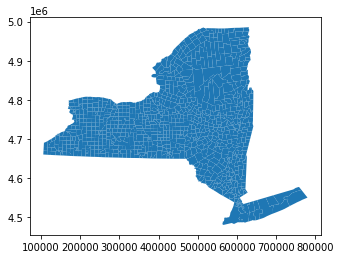

In [111]:
import geopandas as gpd
gdf_nyc = gpd.read_file("NYS_Civil_Boundaries.shp.zip")
gdf_nyc.plot()

In [113]:
gdf_nyc2 = gdf_nyc.to_crs("EPSG:4326")

In [128]:
from shapely.geometry import shape
import matplotlib.pyplot as plt
import geopandas as gpd

for place in phq.places.search(q='New York', country='US'):
    print(place.id, place.name)
#     poly = shape(place.geo.geometry)
#     p = gpd.GeoSeries(poly)
#     p.plot()
#     plt.show()

5128581 New York
5128638 State of New York
5128594 New York County
5115985 East New York
5106292 West New York
5128616 New York Mills
5039192 New York Mills
2641508 New York
4302486 New York
5481279 New York


In [139]:
# gdf_nyc2.crs

CnW4zwacNuxk3T4H8D 86 severe-weather Severe Thunderstorm 2021-12-12
xzqk3LcKH2riwXVmPv 49 severe-weather Flood 2021-07-12
GBNvvgy3a4qTfjQ3WT 49 severe-weather Flood 2021-08-22
BKCc6duJwjqawZuUFN 86 severe-weather Severe Thunderstorm 2021-08-14
4EEvE4TJLH44ig6mz9 49 severe-weather Flood 2021-09-15
6mj6J9mru3iEFbm73u 49 severe-weather Flood 2021-09-08
6FfrpThrggNJTGyDiV 49 severe-weather Flood 2021-08-22
BuvBviv3BwUh4m59Qw 86 severe-weather Severe Thunderstorm 2021-08-12
xx4CMYLciENKU2e23Q 49 severe-weather Flood 2021-07-12
Gp4T5zsHccs6ytJPsW 82 severe-weather Flood 2021-09-15


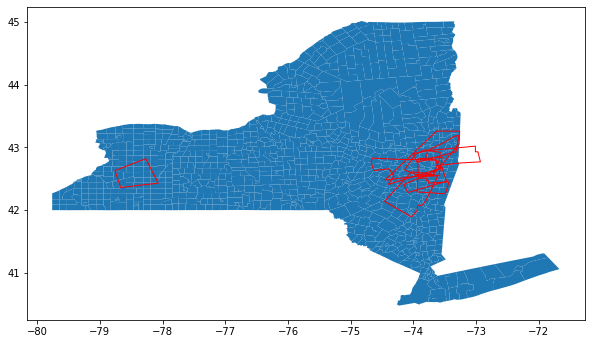

In [133]:
from shapely.geometry import shape
import matplotlib.pyplot as plt
import geopandas as gpd

pl = gdf_nyc2.plot( figsize = (10, 10))
for event in phq.events.search(q='East New York', country='US', category='severe-weather', active__gte="2021-01-01",
        active__lte="2022-01-31",):
    print(event.id, event.rank, event.category, event.title, event.start.strftime('%Y-%m-%d'))
    poly = shape(event.geo.geometry)
    p = gpd.GeoSeries(poly)
    pl = p.plot(ax = pl , color='none', edgecolor = 'red',  figsize = (10, 10))
plt.show()
    

In [135]:
for event in phq.events.search().iter_all():
    print(event.rank, event.category, event.title, event.start.strftime('%Y-%m-%d'))

50 concerts Ace Frehley 2022-03-13
45 expos Say I Do In Tropical North Queensland Wedding Expo 2022 2022-03-13
0 concerts Chris Lane, Ernest, and Lily Rose 2022-03-13
65 sports Süper Lig - Hatayspor vs Fatih Karagümrük 2022-03-13
66 sports Segunda División - Eibar vs Amorebieta 2022-03-13
62 sports Serie C - Girone C - Catanzaro vs Bari 2022-03-13
0 concerts Zaire 2022-03-13
32 sports Primera División Femenina - Levante vs Deportivo Alavés 2022-03-13
50 sports Tercera División RFEF - Group 2 - L'Entregu vs San Martín 2022-03-13
0 concerts Barb Maxey 2022-03-13
